<a href="https://www.kaggle.com/code/funxexcel/completed-p2-dt-feature-importance?scriptVersionId=108224212" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Part 2 : Which features are useful in predicting the target?

## Import Libraries

In [3]:
import numpy as np 
import pandas as pd 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

## Import Data

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-approval-clean-data/clean_dataset.csv
/kaggle/input/credit-card-approval-clean-data/crx.csv


In [5]:
data = pd.read_csv('/kaggle/input/credit-card-approval-clean-data/clean_dataset.csv')

### Describe Data - Get Feature Names

In [6]:
data.columns.tolist()

['Gender',
 'Age',
 'Debt',
 'Married',
 'BankCustomer',
 'Industry',
 'Ethnicity',
 'YearsEmployed',
 'PriorDefault',
 'Employed',
 'CreditScore',
 'DriversLicense',
 'Citizen',
 'ZipCode',
 'Income',
 'Approved']

## Partition Data into X and y

In [7]:
y = data['Approved']
X = data.drop('Approved', axis = 1)

## Create Dummy Variables

In [8]:
X = pd.get_dummies(X)

## Build Decision Tree Model

In [9]:
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X,y)

DecisionTreeClassifier(random_state=42)

## Feature Importance

### 1/ Get Feature Importance Values

In [13]:
dt_model.feature_importances_

array([0.00684634, 0.08122689, 0.05762829, 0.        , 0.01068449,
       0.04304004, 0.51898598, 0.        , 0.05803354, 0.00293415,
       0.06537441, 0.07280569, 0.00951375, 0.00705307, 0.        ,
       0.        , 0.00661127, 0.01252198, 0.        , 0.00385201,
       0.        , 0.00247685, 0.00454987, 0.        , 0.        ,
       0.00315485, 0.01116754, 0.01107154, 0.00561315, 0.00485429,
       0.        , 0.        , 0.        , 0.        ])

### 2/ Get Feature Names 

In [ ]:
#dt_model.feature_names_in_

In [14]:
X.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode',
       'Income', 'Industry_CommunicationServices',
       'Industry_ConsumerDiscretionary', 'Industry_ConsumerStaples',
       'Industry_Education', 'Industry_Energy', 'Industry_Financials',
       'Industry_Healthcare', 'Industry_Industrials',
       'Industry_InformationTechnology', 'Industry_Materials',
       'Industry_Real Estate', 'Industry_Research', 'Industry_Transport',
       'Industry_Utilities', 'Ethnicity_Asian', 'Ethnicity_Black',
       'Ethnicity_Latino', 'Ethnicity_Other', 'Ethnicity_White',
       'Citizen_ByBirth', 'Citizen_ByOtherMeans', 'Citizen_Temporary'],
      dtype='object')

### 3/ Combine Feature Names and Values

In [17]:
tbl_feature_importance = pd.DataFrame({
    'Feature_Name' : X.columns,
    'Feature_Importance' : dt_model.feature_importances_
})

In [19]:
tbl_feature_importance.head()

,Feature_Name,Feature_Importance
0,Gender,0.006846
1,Age,0.081227
2,Debt,0.057628
3,Married,0.000000
4,BankCustomer,0.010684


### 4/ Sort and Get Top 10 Features

In [20]:
top_10_features = tbl_feature_importance.sort_values(by = 'Feature_Importance', ascending = False).head(10)
top_10_features

,Feature_Name,Feature_Importance
6,PriorDefault,0.518986
1,Age,0.081227
11,Income,0.072806
10,ZipCode,0.065374
8,CreditScore,0.058034
2,Debt,0.057628
5,YearsEmployed,0.043040
17,Industry_Financials,0.012522
26,Ethnicity_Asian,0.011168
27,Ethnicity_Black,0.011072


### 5/ Plot 

<AxesSubplot:xlabel='Feature_Name'>

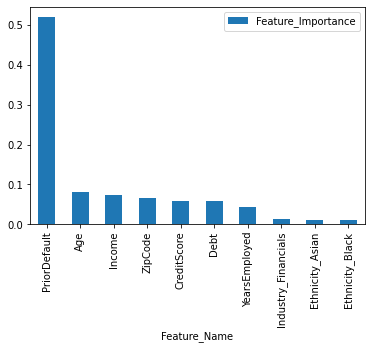

In [21]:
top_10_features.plot.bar('Feature_Name','Feature_Importance')

# What do you observe?